### Logistic Regression and KNN model comparison exercise_Grace Jeong

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("diabetes.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [4]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Feature scaling and Outliers detection

In [6]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


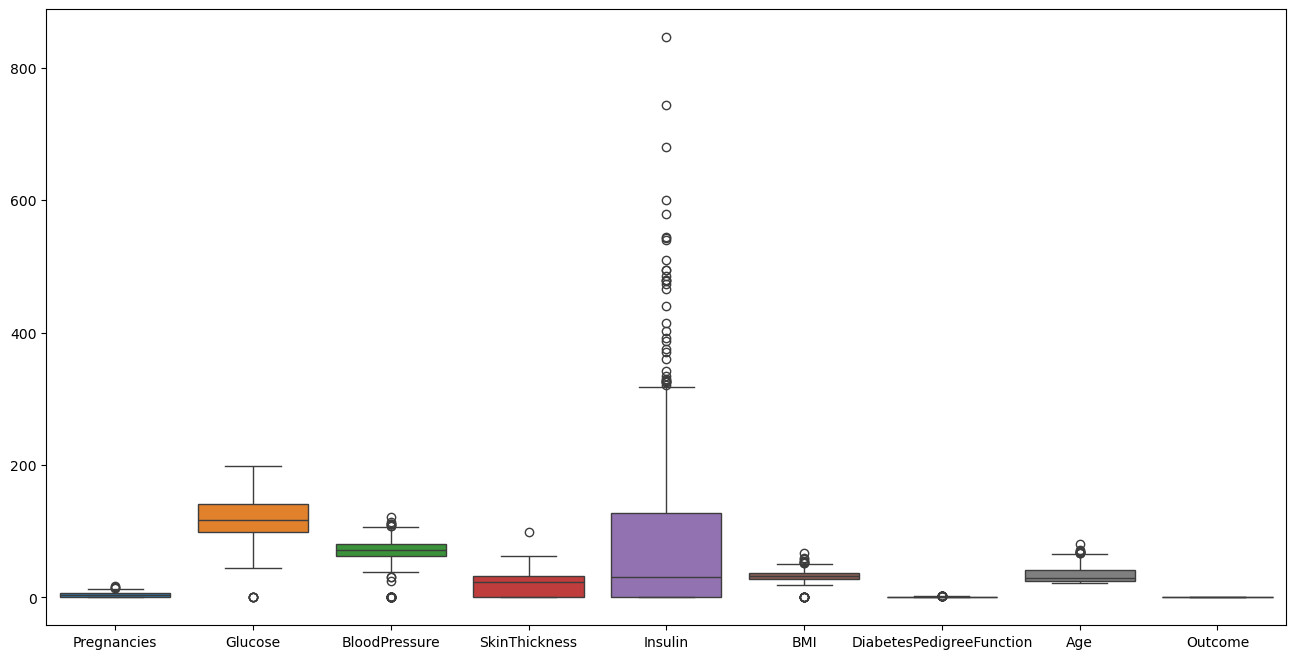

In [7]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data)
plt.show()

In [8]:
X = data.drop('Outcome', axis=1)  # Exclude the target variable 'Outcome'
Y = data['Outcome']

# 70/30 split
X_train_70, X_test_70, Y_train_70, Y_test_70 = train_test_split(X, Y, test_size=0.3, random_state=42)

# 60/40 split
X_train_60, X_test_60, Y_train_60, Y_test_60 = train_test_split(X, Y, test_size=0.4, random_state=42)

robust_scaler = RobustScaler()

X_train_70_scaled = robust_scaler.fit_transform(X_train_70)
X_train_60_scaled = robust_scaler.fit_transform(X_train_60)


X_test_70_scaled = robust_scaler.transform(X_test_70)
X_test_60_scaled = robust_scaler.transform(X_test_60)

# scaled_features = robust_scaler.fit_transform(X)

# scaled_data = pd.DataFrame(scaled_features, columns=X.columns)
# scaled_data['Outcome'] = data['Outcome']

### Logistic Regression

In [10]:
lr = LogisticRegression(random_state=16, max_iter=500)
lr.fit(X_train_70_scaled, Y_train_70)

LogisticRegression(max_iter=500, random_state=16)

In [11]:
Y_pred = lr.predict(X_test_70_scaled)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
diff_df = pd.DataFrame({'Actual' : Y_test_70, 'Predicted': Y_pred})
diff_df

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
619,1,0
198,1,0
538,0,0
329,0,0


In [13]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test_70, Y_pred)
conf_matrix

array([[122,  29],
       [ 32,  48]], dtype=int64)

### Observations:

True Negatives (TN) = 122
The model correctly predicted 78 people as "No Diabetes."

False Positives (FP) = 29
The model incorrectly predicted 21 people as having diabetes when they actually didn't (Type I error).

False Negatives (FN) = 32
The model incorrectly predicted 18 people as "No Diabetes" when they actually had diabetes (Type II error).

True Positives (TP) = 48

The model correctly predicted 37 people as having diabetes.

In [15]:
from sklearn.metrics import classification_report

target_names = ['without diabetes', 'with diabetes']
print(classification_report(Y_test_70, Y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.81      0.80       151
   with diabetes       0.62      0.60      0.61        80

        accuracy                           0.74       231
       macro avg       0.71      0.70      0.71       231
    weighted avg       0.73      0.74      0.73       231



### Observations (70/30):

Accuracy = 74% → The model correctly classifies 74% of all instances in the dataset. 

### Precision (Positive Predictive Value): 
Without diabetes: 0.79 → When the model predicts "without diabetes", it's correct 79% of the time. 

With diabetes: 0.62 → When the model predicts "with diabetes", it's correct 62% of the time.

### Recall (Sensitivity/True Positive Rate): 

Without diabetes: 0.81 → The model correctly identifies 81% of all actual "without diabetes" cases. 

With diabetes: 0.60 → The model correctly identifies 60% of all actual "with diabetes" cases.

### F1-score (Balance between Precision & Recall): 

Without diabetes: 0.80 

With diabetes: 0.61

Since the F1-score for "with diabetes" is lower, the model struggles more with correctly predicting positive cases.

### Key Observations
The model performs better in predicting "without diabetes" than "with diabetes" (higher precision, recall, and F1-score). The imbalance in class distribution 151 vs. 80) might be causing the lower performance for "with diabetes" cases. The recall for "with diabetes" is 0.60, meaning 40% of actual diabetes cases are misclassified. This could be a problem in a medical setting where missing a diabetes diagnosis is critical.

### AUC-ROC curve

In [19]:
Y_probs = lr.predict_proba(X_test_70_scaled)
Y_probs

array([[0.73140994, 0.26859006],
       [0.81214317, 0.18785683],
       [0.87719373, 0.12280627],
       [0.85081914, 0.14918086],
       [0.51381464, 0.48618536],
       [0.54912509, 0.45087491],
       [0.98563184, 0.01436816],
       [0.41971646, 0.58028354],
       [0.46002484, 0.53997516],
       [0.22049902, 0.77950098],
       [0.76958193, 0.23041807],
       [0.10915027, 0.89084973],
       [0.6200021 , 0.3799979 ],
       [0.72388604, 0.27611396],
       [0.93120333, 0.06879667],
       [0.6595198 , 0.3404802 ],
       [0.86617752, 0.13382248],
       [0.92806682, 0.07193318],
       [0.16480144, 0.83519856],
       [0.4172153 , 0.5827847 ],
       [0.78657084, 0.21342916],
       [0.92099547, 0.07900453],
       [0.52239466, 0.47760534],
       [0.90310864, 0.09689136],
       [0.45882184, 0.54117816],
       [0.12645069, 0.87354931],
       [0.89086889, 0.10913111],
       [0.96875164, 0.03124836],
       [0.7119677 , 0.2880323 ],
       [0.88450996, 0.11549004],
       [0.

In [20]:
#Since AUC-ROC curve only considers the positive class, we only choose the probabilities for class 1
Y_probs = Y_probs[:, 1]
Y_probs

array([0.26859006, 0.18785683, 0.12280627, 0.14918086, 0.48618536,
       0.45087491, 0.01436816, 0.58028354, 0.53997516, 0.77950098,
       0.23041807, 0.89084973, 0.3799979 , 0.27611396, 0.06879667,
       0.3404802 , 0.13382248, 0.07193318, 0.83519856, 0.5827847 ,
       0.21342916, 0.07900453, 0.47760534, 0.09689136, 0.54117816,
       0.87354931, 0.10913111, 0.03124836, 0.2880323 , 0.11549004,
       0.90617457, 0.86839228, 0.79293969, 0.7901854 , 0.62552774,
       0.66310977, 0.94634759, 0.22031769, 0.4730881 , 0.71241914,
       0.06519852, 0.55096381, 0.54456981, 0.3131284 , 0.02981638,
       0.50375341, 0.58375574, 0.21084886, 0.31734663, 0.95722796,
       0.04600574, 0.63909915, 0.81989785, 0.24580996, 0.10517692,
       0.04015023, 0.77205629, 0.00408069, 0.39031711, 0.76032442,
       0.7064234 , 0.34113622, 0.22185549, 0.20230628, 0.08864668,
       0.60828216, 0.04686534, 0.78197578, 0.03590173, 0.77674795,
       0.67903074, 0.06982367, 0.17046336, 0.12493943, 0.09021

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

roc_auc = roc_auc_score(Y_test_70, Y_probs)
roc_auc

0.7988410596026491

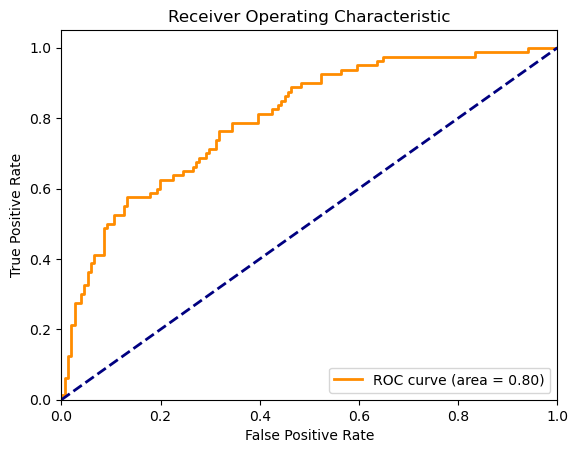

In [22]:
#Visualizing the AUC-ROC score
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test_70, Y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#Sets the baseline for any classification algorithm
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
lr = LogisticRegression(random_state=16, max_iter=500)
lr.fit(X_train_60_scaled, Y_train_60)

LogisticRegression(max_iter=500, random_state=16)

In [24]:
Y_pred = lr.predict(X_test_60_scaled)
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [25]:
diff_df = pd.DataFrame({'Actual' : Y_test_60, 'Predicted': Y_pred})
diff_df

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,1
...,...,...
367,0,0
446,0,0
589,0,0
342,0,0


In [26]:
conf_matrix = confusion_matrix(Y_test_60, Y_pred)
conf_matrix

array([[168,  38],
       [ 37,  65]], dtype=int64)

### Observations:

True Negatives (TN) = 168
The model correctly predicted 168 people as "No Diabetes."

False Positives (FP) = 38
The model incorrectly predicted 38 people as having diabetes when they actually didn't (Type I error).

False Negatives (FN) = 37
The model incorrectly predicted 37 people as "No Diabetes" when they actually had diabetes (Type II error).

True Positives (TP) = 65
The model correctly predicted 65 people as having diabetes.

In [28]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(Y_test_60, Y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.82      0.82       206
   with diabetes       0.63      0.64      0.63       102

        accuracy                           0.76       308
       macro avg       0.73      0.73      0.73       308
    weighted avg       0.76      0.76      0.76       308



### Observations (60/40):

Accuracy = 76% → The model correctly classifies 76% of all instances in the dataset. 

### Precision (Positive Predictive Value): 
Without diabetes: 0.82 → When the model predicts "without diabetes", it's correct 82% of the time. 

With diabetes: 0.63 → When the model predicts "with diabetes", it's correct 63% of the time.

### Recall (Sensitivity/True Positive Rate): 

Without diabetes: 0.82 → The model correctly identifies 82% of all actual "without diabetes" cases. 

With diabetes: 0.64 → The model correctly identifies 64% of all actual "with diabetes" cases.

### F1-score (Balance between Precision & Recall): 

Without diabetes: 0.82

With diabetes: 0.63

Since the F1-score for "with diabetes" is lower, the model struggles more with correctly predicting positive cases.

### Key Observations
The model performs better in predicting "without diabetes" than "with diabetes" (higher precision, recall, and F1-score). The imbalance in class distribution 206 vs. 102) might be causing the lower performance for "with diabetes" cases. The recall for "with diabetes" is 0.64, meaning 36% of actual diabetes cases are misclassified. This could be a problem in a medical setting where missing a diabetes diagnosis is critical.

### AUC-ROC curve

In [32]:
Y_probs = lr.predict_proba(X_test_60_scaled)
Y_probs

array([[0.69071156, 0.30928844],
       [0.80208235, 0.19791765],
       [0.8576743 , 0.1423257 ],
       [0.82559374, 0.17440626],
       [0.49120368, 0.50879632],
       [0.50693267, 0.49306733],
       [0.98133959, 0.01866041],
       [0.40812269, 0.59187731],
       [0.45983819, 0.54016181],
       [0.21869479, 0.78130521],
       [0.74307172, 0.25692828],
       [0.12393883, 0.87606117],
       [0.5854914 , 0.4145086 ],
       [0.69405276, 0.30594724],
       [0.9217291 , 0.0782709 ],
       [0.6527064 , 0.3472936 ],
       [0.84872131, 0.15127869],
       [0.91248258, 0.08751742],
       [0.17341347, 0.82658653],
       [0.41356444, 0.58643556],
       [0.75553082, 0.24446918],
       [0.90875751, 0.09124249],
       [0.49851649, 0.50148351],
       [0.88838287, 0.11161713],
       [0.42607392, 0.57392608],
       [0.14377621, 0.85622379],
       [0.87772697, 0.12227303],
       [0.96286564, 0.03713436],
       [0.68408417, 0.31591583],
       [0.86314379, 0.13685621],
       [0.

In [33]:
#Since AUC-ROC curve only considers the positive class, we only choose the probabilities for class 1
Y_probs = Y_probs[:, 1]
Y_probs

array([0.30928844, 0.19791765, 0.1423257 , 0.17440626, 0.50879632,
       0.49306733, 0.01866041, 0.59187731, 0.54016181, 0.78130521,
       0.25692828, 0.87606117, 0.4145086 , 0.30594724, 0.0782709 ,
       0.3472936 , 0.15127869, 0.08751742, 0.82658653, 0.58643556,
       0.24446918, 0.09124249, 0.50148351, 0.11161713, 0.57392608,
       0.85622379, 0.12227303, 0.03713436, 0.31591583, 0.13685621,
       0.88965903, 0.8660921 , 0.78693713, 0.77671143, 0.64202157,
       0.67208913, 0.9176435 , 0.22085896, 0.50412494, 0.72312088,
       0.07933188, 0.55013714, 0.55547659, 0.36962961, 0.0383285 ,
       0.50545002, 0.59299617, 0.23187146, 0.34811165, 0.95186126,
       0.054596  , 0.64846414, 0.83937037, 0.25903595, 0.11733345,
       0.04964796, 0.76936154, 0.0055022 , 0.40027657, 0.75768749,
       0.69595161, 0.34749262, 0.26373656, 0.26733088, 0.10498153,
       0.57268288, 0.05580235, 0.79253068, 0.04134309, 0.78926632,
       0.69779077, 0.08318894, 0.20788733, 0.13903995, 0.10966

In [34]:
roc_auc = roc_auc_score(Y_test_60, Y_probs)
roc_auc

0.8254806777079764

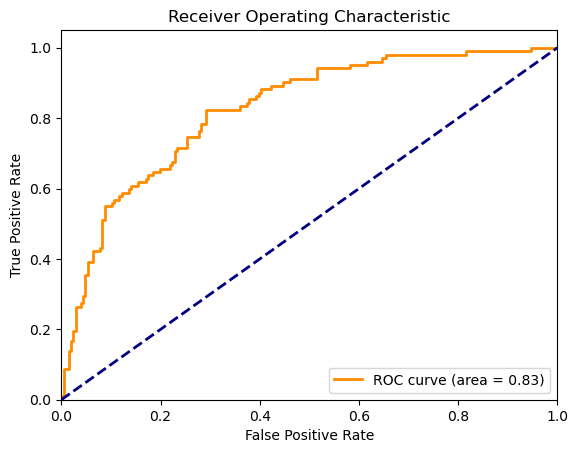

In [35]:
#Visualizing the AUC-ROC score
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test_60, Y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#Sets the baseline for any classification algorithm
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Comparing the Performance:
70/30 Split: AUC = 0.798 → Moderate performance.

60/40 Split: AUC = 0.825 → Improved performance.

### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [39]:
#Test different values of k to perform KNN  (70/30)
error_rates = []
k_values_70 = range(1, 101)
for k in k_values_70:
    knn_70 = KNeighborsClassifier(n_neighbors=k)
    knn_70.fit(X_train_70_scaled, Y_train_70)  # Train the model
    Y_pred = knn_70.predict(X_test_70_scaled)  # Predict on test set
    error = 1 - accuracy_score(Y_test_70, Y_pred)  # Calculate error rate
    error_rates.append(error)

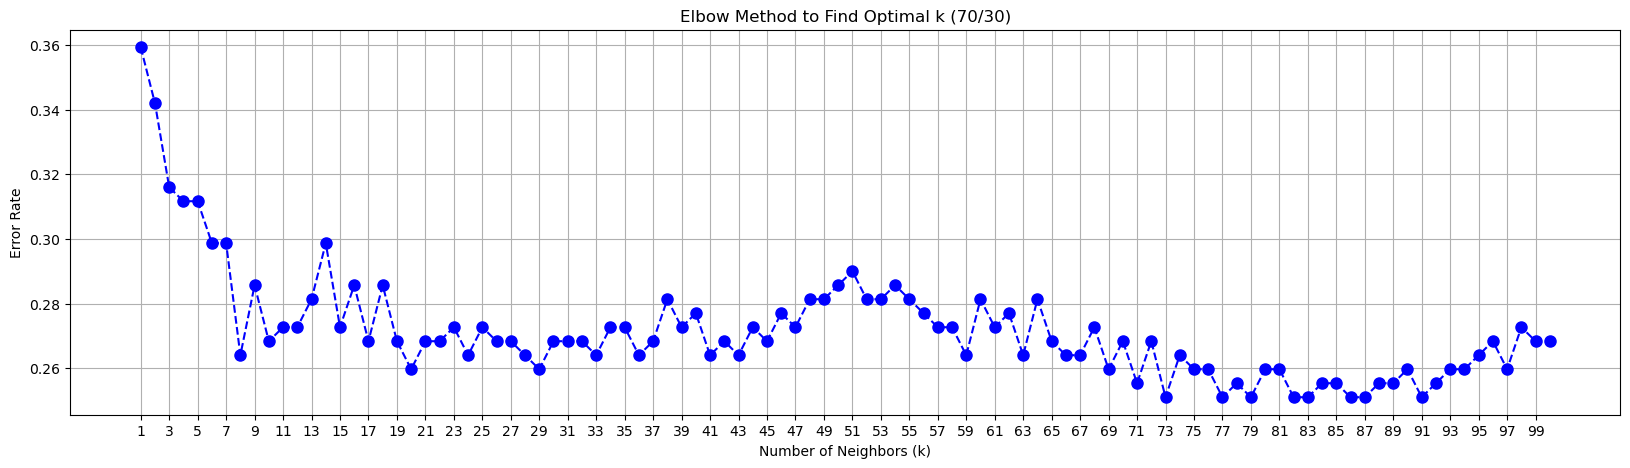

In [40]:
#Plot the elbow curve to find the optimal value of k  (70/30)
plt.figure(figsize=(20, 5))
plt.plot(k_values_70, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k (70/30)')
plt.xticks(np.arange(1, 101, step=2))
plt.grid(True)
plt.show()

### Observation (70/30): The error rate significantly decreased when k=73, 77, 79, 82, 83, 86, 87 and k=91. After that, we don't see any further dip. 

In [42]:
# Calculate test accuracy when k=73

knn_73 = KNeighborsClassifier(n_neighbors=73)
knn_73.fit(X_train_70_scaled, Y_train_70)
Y_pred_73 = knn_73.predict(X_test_70_scaled)
print(f"Accuracy score for KNN with 73 neighbors : {accuracy_score(Y_test_70, Y_pred_73)}")

Accuracy score for KNN with 73 neighbors : 0.7489177489177489


In [43]:
# Calculate test accuracy when k=77

knn_77 = KNeighborsClassifier(n_neighbors=77)
knn_77.fit(X_train_70_scaled, Y_train_70)
Y_pred_77 = knn_77.predict(X_test_70_scaled)
print(f"Accuracy score for KNN with 77 neighbors : {accuracy_score(Y_test_70, Y_pred_73)}")

Accuracy score for KNN with 77 neighbors : 0.7489177489177489


In [44]:
# Calculate test accuracy when k=79

knn_79 = KNeighborsClassifier(n_neighbors=79)
knn_79.fit(X_train_70_scaled, Y_train_70)
Y_pred_79 = knn_79.predict(X_test_70_scaled)
print(f"Accuracy score for KNN with 79 neighbors : {accuracy_score(Y_test_70, Y_pred_79)}")

Accuracy score for KNN with 79 neighbors : 0.7489177489177489


In [45]:
# Calculate test accuracy when k=82

knn_82 = KNeighborsClassifier(n_neighbors=82)
knn_82.fit(X_train_70_scaled, Y_train_70)
Y_pred_82 = knn_82.predict(X_test_70_scaled)
print(f"Accuracy score for KNN with 82 neighbors : {accuracy_score(Y_test_70, Y_pred_82)}")

Accuracy score for KNN with 82 neighbors : 0.7489177489177489


In [46]:
# Calculate test accuracy when k=83

knn_83 = KNeighborsClassifier(n_neighbors=83)
knn_83.fit(X_train_70_scaled, Y_train_70)
Y_pred_83 = knn_83.predict(X_test_70_scaled)
print(f"Accuracy score for KNN with 83 neighbors : {accuracy_score(Y_test_70, Y_pred_83)}")

Accuracy score for KNN with 83 neighbors : 0.7489177489177489


In [47]:
# Calculate test accuracy when k=86

knn_86 = KNeighborsClassifier(n_neighbors=86)
knn_86.fit(X_train_70_scaled, Y_train_70)
Y_pred_86 = knn_86.predict(X_test_70_scaled)
print(f"Accuracy score for KNN with 86 neighbors : {accuracy_score(Y_test_70, Y_pred_86)}")

Accuracy score for KNN with 86 neighbors : 0.7489177489177489


In [48]:
# Calculate test accuracy when k=87

knn_87 = KNeighborsClassifier(n_neighbors=87)
knn_87.fit(X_train_70_scaled, Y_train_70)
Y_pred_87 = knn_87.predict(X_test_70_scaled)
print(f"Accuracy score for KNN with 87 neighbors : {accuracy_score(Y_test_70, Y_pred_87)}")

Accuracy score for KNN with 87 neighbors : 0.7489177489177489


In [49]:
# Calculate test accuracy when k=86

knn_91 = KNeighborsClassifier(n_neighbors=91)
knn_91.fit(X_train_70_scaled, Y_train_70)
Y_pred_91 = knn_91.predict(X_test_70_scaled)
print(f"Accuracy score for KNN with 91 neighbors : {accuracy_score(Y_test_70, Y_pred_91)}")

Accuracy score for KNN with 91 neighbors : 0.7489177489177489


### Observation (70/30): Since the accuracy score is same for k=73, 77, 79, 82, 83, 86, 87 and k=91 further perform cross validation.

In [51]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [52]:
#Calculate cross validation score k=73, 77, 79, 82, 83, 86, 87, and k=91.

score_k_73 = cross_val_score(knn_73, X_train_70_scaled, Y_train_70, cv=5)
score_k_77 = cross_val_score(knn_77, X_train_70_scaled, Y_train_70, cv=5)
score_k_79 = cross_val_score(knn_79, X_train_70_scaled, Y_train_70, cv=5)
score_k_82 = cross_val_score(knn_82, X_train_70_scaled, Y_train_70, cv=5)
score_k_83 = cross_val_score(knn_83, X_train_70_scaled, Y_train_70, cv=5)
score_k_86 = cross_val_score(knn_86, X_train_70_scaled, Y_train_70, cv=5)
score_k_87 = cross_val_score(knn_87, X_train_70_scaled, Y_train_70, cv=5)
score_k_91 = cross_val_score(knn_91, X_train_70_scaled, Y_train_70, cv=5)

avg_score_k_73 = mean(score_k_73)
avg_score_k_77 = mean(score_k_77)
avg_score_k_79 = mean(score_k_79)
avg_score_k_82 = mean(score_k_82)
avg_score_k_83 = mean(score_k_83)
avg_score_k_86 = mean(score_k_86)
avg_score_k_87 = mean(score_k_87)
avg_score_k_91 = mean(score_k_91)

print(f"Average score for 73 neighbors: {avg_score_k_73}")
print(f"Average score for 77 neighbors: {avg_score_k_77}")
print(f"Average score for 79 neighbors: {avg_score_k_79}")
print(f"Average score for 82 neighbors: {avg_score_k_82}")
print(f"Average score for 83 neighbors: {avg_score_k_83}")
print(f"Average score for 86 neighbors: {avg_score_k_86}")
print(f"Average score for 87 neighbors: {avg_score_k_87}")
print(f"Average score for 91 neighbors: {avg_score_k_91}")

Average score for 73 neighbors: 0.7281758393907927
Average score for 77 neighbors: 0.733748701973001
Average score for 79 neighbors: 0.7337313949463482
Average score for 82 neighbors: 0.7262720664589823
Average score for 83 neighbors: 0.7281066112841814
Average score for 86 neighbors: 0.7225683627552786
Average score for 87 neighbors: 0.7225856697819314
Average score for 91 neighbors: 0.7281239183108342


### Observation (70/30): Since the cross validation score is higher for 77 neighbors compared to 73, 79, 82, 83, 86, 87, 91, k=77 is chosen as optimal k to perform KNN

### Plot the AUC-ROC curve to compare the performances of Logistic Regression and KNN

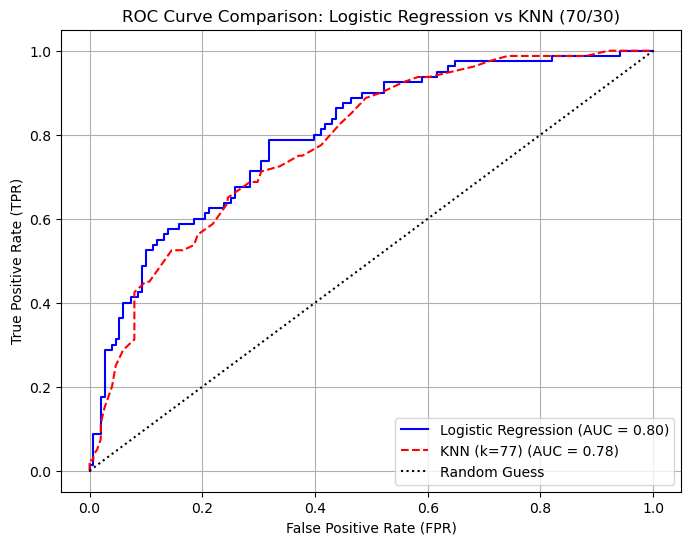

In [131]:
Y_lr_probs = lr.predict_proba(X_test_70_scaled)[:, 1]
Y_knn_77_probs = knn_77.predict_proba(X_test_70_scaled)[:, 1]

# Compute ROC curve and AUC for both models
fpr_lr, tpr_lr, _ = roc_curve(Y_test_70, Y_lr_probs)
auc_log = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(Y_test_70, Y_knn_77_probs)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=77) (AUC = {auc_knn:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regression vs KNN (70/30)")
plt.legend()
plt.grid(True)
plt.show()

### Observation (70/30): The model that is closer to top left is the better performing model. Here Logistic Regression is better performing model, since the AUC score is higher than KNN. This means that Logistic Regression provides a better balance in predicting patients that are diabetic and not diabetic.

In [57]:
#Test different values of k to perform KNN  (60/40)
error_rates = []
k_values_60 = range(1, 101)
for k in k_values_60:
    knn_60 = KNeighborsClassifier(n_neighbors=k)
    knn_60.fit(X_train_60_scaled, Y_train_60)  # Train the model
    Y_pred = knn_60.predict(X_test_60_scaled)  # Predict on test set
    error = 1 - accuracy_score(Y_test_60, Y_pred)  # Calculate error rate
    error_rates.append(error)

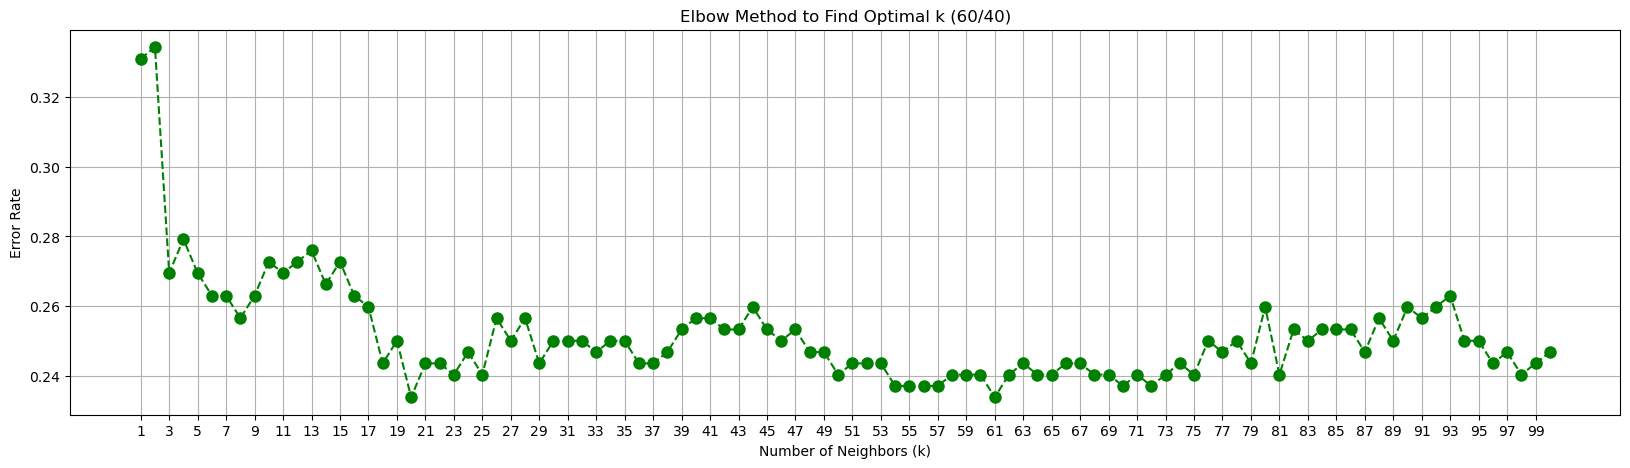

In [58]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values_60, error_rates, marker='o', linestyle='dashed', color='g', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k (60/40)')
plt.xticks(np.arange(1, 101, step=2))
plt.grid(True)
plt.show()

### Observation (60/40): The error rate significantly decreased when k=20 and k=61. After that, we don't see any further dip. 

In [60]:
### Calculate test accuracy when k=20

knn_20 = KNeighborsClassifier(n_neighbors=20)
knn_20.fit(X_train_60_scaled, Y_train_60)
Y_pred_20 = knn_20.predict(X_test_60_scaled)
print(f"Accuracy score for KNN with 20 neighbors : {accuracy_score(Y_test_60, Y_pred_20)}")

Accuracy score for KNN with 20 neighbors : 0.7662337662337663


In [61]:
### Calculate test accuracy when k=61

knn_61 = KNeighborsClassifier(n_neighbors=61)
knn_61.fit(X_train_60_scaled, Y_train_60)
Y_pred_61 = knn_61.predict(X_test_60_scaled)
print(f"Accuracy score for KNN with 61 neighbors : {accuracy_score(Y_test_60, Y_pred_61)}")

Accuracy score for KNN with 61 neighbors : 0.7662337662337663


### Observation (60/40): Since the accuracy score is same for both k=20 and k=61, further perform cross validation

In [63]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [64]:
#Calculate cross validation score k=20 and k=61
score_k_20 = cross_val_score(knn_20, X_train_60_scaled, Y_train_60, cv=5)
score_k_61 = cross_val_score(knn_61, X_train_60_scaled, Y_train_60, cv=5)
avg_score_k_20 = mean(score_k_20)
avg_score_k_61 = mean(score_k_61)

print(f"Average score for 20 neighbors: {avg_score_k_20}")
print(f"Average score for 61 neighbors: {avg_score_k_61}")

Average score for 20 neighbors: 0.7652173913043478
Average score for 61 neighbors: 0.7347826086956522


### Observation (60/40): Since the cross validation score is higher for 20 neighbors compared to 61, k=20 is choosen as optimal k to perform KNN

### Plot the AUC-ROC curve to compare the performances of Logistic Regression and KNN

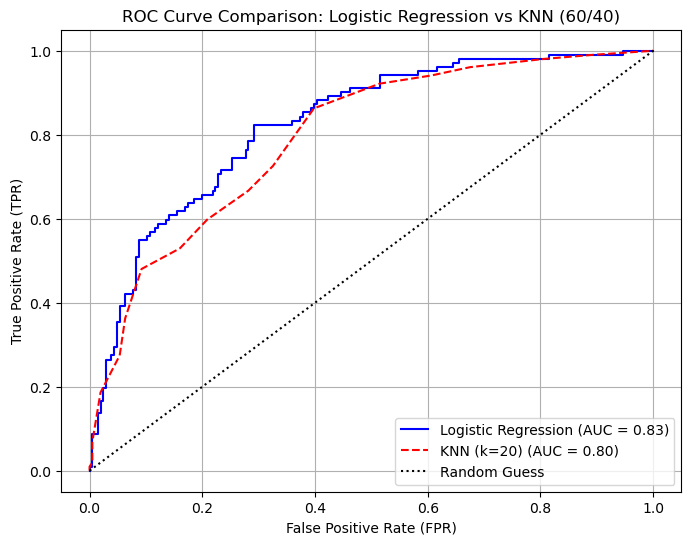

In [133]:
Y_lr_probs = lr.predict_proba(X_test_60_scaled)[:, 1]
Y_knn_20_probs = knn_20.predict_proba(X_test_60_scaled)[:, 1]

# Compute ROC curve and AUC for both models
fpr_lr, tpr_lr, _ = roc_curve(Y_test_60, Y_lr_probs)
auc_log = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(Y_test_60, Y_knn_20_probs)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=20) (AUC = {auc_knn:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regression vs KNN (60/40)")
plt.legend()
plt.grid(True)
plt.show()

### Observation (60/40): 

The model that is closer to top left is the better performing model. Here Logistic Regression is better performing model, since the AUC score is higher than KNN. This means that Logistic Regression provides a better balance in predicting patients that are diabetic and not diabetic.

### Compute training and test accuracy

#### Logistic Regression (70/30)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_70_scaled, Y_train_70)

# Predictions
Y_train_pred_lr = lr.predict(X_train_70_scaled)
Y_test_pred_lr = lr.predict(X_test_70_scaled)

# Accuracy
train_acc_lr = accuracy_score(Y_train_70, Y_train_pred_lr)
test_acc_lr = accuracy_score(Y_test_70, Y_test_pred_lr)

print(f"Logistic Regression Training Accuracy: {train_acc_lr:.4f}")
print(f"Logistic Regression Test Accuracy: {test_acc_lr:.4f}")


Logistic Regression Training Accuracy: 0.7840
Logistic Regression Test Accuracy: 0.7359


#### KNN (70/30)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

optimal_k = 77
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_70_scaled, Y_train_70)

# Predictions
Y_train_pred_knn = knn.predict(X_train_70_scaled)
Y_test_pred_knn = knn.predict(X_test_70_scaled)

# Accuracy
train_acc_knn = accuracy_score(Y_train_70, Y_train_pred_knn)
test_acc_knn = accuracy_score(Y_test_70, Y_test_pred_knn)

print(f"KNN Training Accuracy (k={optimal_k}): {train_acc_knn:.4f}")
print(f"KNN Test Accuracy (k={optimal_k}): {test_acc_knn:.4f}")


KNN Training Accuracy (k=77): 0.7561
KNN Test Accuracy (k=77): 0.7489


#### Overfitting: Training Accracy > Test Accuracy

* Accuracy Gap of Logistic Regression (70/30): 4.8%

There is a slight difference between training and test accuracy, but it's not large. No strong signs of overfitting. The model generalized reasonably well.

* Accuracy Gap of KNN (70/30): 0.72%

The training and test accuracy are almost identical. No overfitting was detected. The model is well-balanced.

#### Logistic Regression (60/40)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_60_scaled, Y_train_60)

# Predictions
Y_train_pred_lr = lr.predict(X_train_60_scaled)
Y_test_pred_lr = lr.predict(X_test_60_scaled)

# Accuracy
train_acc_lr = accuracy_score(Y_train_60, Y_train_pred_lr)
test_acc_lr = accuracy_score(Y_test_60, Y_test_pred_lr)

print(f"Logistic Regression Training Accuracy: {train_acc_lr:.4f}")
print(f"Logistic Regression Test Accuracy: {test_acc_lr:.4f}")


Logistic Regression Training Accuracy: 0.7696
Logistic Regression Test Accuracy: 0.7565


#### KNN (60/40)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

optimal_k = 20
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_60_scaled, Y_train_60)

# Predictions
Y_train_pred_knn = knn.predict(X_train_60_scaled)
Y_test_pred_knn = knn.predict(X_test_60_scaled)

# Accuracy
train_acc_knn = accuracy_score(Y_train_60, Y_train_pred_knn)
test_acc_knn = accuracy_score(Y_test_60, Y_test_pred_knn)

print(f"KNN Training Accuracy (k={optimal_k}): {train_acc_knn:.4f}")
print(f"KNN Test Accuracy (k={optimal_k}): {test_acc_knn:.4f}")


KNN Training Accuracy (k=20): 0.7957
KNN Test Accuracy (k=20): 0.7662


#### Overfitting: Training Accracy > Test Accuracy

* Accuracy Gap of Logistic Regression (60/40): 1.31%

The gap between training and test accuracy is small (1.31%), which means no overfitting. The model generalizes well.

* Accuracy Gap of KNN (60/40): 2.95%

The accuracy gap is slightly larger than Logistic Regression but still within a reasonable range. No severe overfitting, but KNN (k=20) is slightly more sensitive to training data.